### Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor 
# Nova adição para feature engineering 
from scipy.stats import boxcox

### Leitura de datasets

In [2]:
# Carregar datasets
df_train = pd.read_csv(r'X:\Dissertacao\python_projects\dataset\ISCX-Bot-2014\ISCX_csv\Testing_file.csv',
                       encoding='ISO-8859-1')

df_test = pd.read_csv(r'X:\Dissertacao\python_projects\dataset\ISCX-Bot-2014\ISCX_csv\Training_file.csv',
                      encoding='ISO-8859-1')

### Exploração dos dados

In [3]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114514 entries, 0 to 5114513
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   No.          int64  
 1   Time         float64
 2   Source       object 
 3   Destination  object 
 4   Protocol     object 
 5   Length       int64  
 6   Info         object 
dtypes: float64(1), int64(2), object(4)
memory usage: 273.1+ MB


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,NaN,NaN,Ethernet,60,[Packet size limited during capture]
1,2,6.985427,0.0.0.0,255.255.255.255,DHCP,348,DHCP Discover - Transaction ID 0x6145b920
2,3,6.985565,10.0.2.2,10.0.2.15,DHCP,590,DHCP Offer - Transaction ID 0x6145b920
3,4,6.985927,0.0.0.0,255.255.255.255,DHCP,373,DHCP Request - Transaction ID 0x6145b920
4,5,6.985998,10.0.2.2,10.0.2.15,DHCP,590,DHCP ACK - Transaction ID 0x6145b920


In [4]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388270 entries, 0 to 9388269
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   No.          int64  
 1   Time         float64
 2   Source       object 
 3   Destination  object 
 4   Protocol     object 
 5   Length       int64  
 6   Info         object 
dtypes: float64(1), int64(2), object(4)
memory usage: 501.4+ MB


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
1,2,8.982709,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
2,3,50.099564,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
3,4,50.369266,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85
4,5,51.369054,54:52:00:00:00:01,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.85


In [5]:
print("Treino (nulos):\n",df_train.isnull().sum())  
print("Teste (nulos):\n",df_test.isnull().sum())  

Treino (nulos):
 No.               0
Time              0
Source            1
Destination       1
Protocol          0
Length            0
Info           3898
dtype: int64
Teste (nulos):
 No.                0
Time               0
Source             0
Destination        0
Protocol           0
Length             0
Info           49110
dtype: int64


In [6]:
print(df_train['Time'].describe())  
print("Valores negativos de tempo: ", (df_train['Time'] < 0).sum())  

count    5.114514e+06
mean     1.284569e+09
std      4.879074e+07
min      0.000000e+00
25%      1.276250e+09
50%      1.276579e+09
75%      1.313450e+09
max      1.359942e+09
Name: Time, dtype: float64
Valores negativos de tempo:  0


In [7]:
print(df_test['Time'].describe())  
print("Valores negativos de tempo: ", (df_test['Time'] < 0).sum()) 

count    9.388270e+06
mean    -4.999973e+07
std      3.936417e+07
min     -1.211172e+08
25%     -3.664793e+07
50%     -3.662771e+07
75%     -3.659487e+07
max      7.802317e+05
Name: Time, dtype: float64
Valores negativos de tempo:  8171941


In [8]:
print("Protocolos em Training:")
print(df_train["Protocol"].unique())
# ________________________________ #
print("\nProtocolos em Testing:")
print(df_test["Protocol"].unique())

Protocolos em Training:
['Ethernet' 'DHCP' 'ARP' 'SSDP' 'ICMP' 'IGMPv3' 'NBNS' 'BROWSER' 'DNS'
 'TCP' 'HTTP' 'NBSS' 'SMB' 'LANMAN' 'DCERPC' 'SRVSVC' 'WKSSVC' 'SPOOLSS'
 'SMB Pipe' 'UDP' 'SSLv2' 'IRC' 'TLSv1' 'SNMP' 'SMTP' 'SMTP/IMF' 'SSLv3'
 'NTP' 'HTTP/JSON' 'IPv4' 'SSH' 'PKIX-CRL' 'RDP' 'COTP' 'T.125' 'HTTP/XML'
 'CLASSIC-STUN' 'IOXIDResolver' 'ISystemActivator' 'X11' 'RTCP' 'SSL'
 'SIP' 'DB-LSP-DISC/JSON' 'ICMPv6' 'LLMNR' 'UDP/XML' 'DHCPv6' 'STP'
 'RIPv2' '0x0000' 'DB-LSP-DISC' '0x0700' 'LLDP' 'IPX SAP' 'NBDS' 'SRVLOC'
 'BOOTP' '0xffff' 'MDNS' 'IGMPv1' '0x4b0d' '0x4000' 'LLC' '0xe000' 'SSHv2'
 '0x3339' 'IGMPv2' 'IPv6' 'DTLS' 'eDonkey' 'ALLJOYN-NS'
 'openSAFETY over UDP' '0x2aa1' 'ECMP' 'TCP, HiPerConTracer' 'H1'
 'BitTorrent' 'SIGCOMP' 'MSMMS' 'TRDP' 'QUAKEWORLD' 'ECHO' 'H.225.0'
 'GPRS-NS' '5co-legacy' 'UDP, HiPerConTracer' 'WSP' 'QUAKE3' '0xc8d8'
 'VxLAN' '0xb0c8' '0x9cb1' '0x33a5' 'MSNMS' 'FIND' 'CIP I/O' 'POP'
 'POP/IMF' 'BT-DHT' 'LSD' 'WireGuard' 'FTP' 'FTP-DATA' 'IMAP' 'KDP'
 

In [9]:
print(df_train['Length'].describe())  # Min, max, mean, etc.
print("============================")
print(df_test['Length'].describe())  # Min, max, mean, etc.

count    5.114514e+06
mean     4.545508e+02
std      1.057905e+03
min      4.200000e+01
25%      6.000000e+01
50%      6.700000e+01
75%      6.240000e+02
max      6.523800e+04
Name: Length, dtype: float64
count    9.388270e+06
mean     5.448353e+02
std      6.522112e+02
min      5.400000e+01
25%      6.000000e+01
50%      9.600000e+01
75%      1.434000e+03
max      1.903400e+04
Name: Length, dtype: float64


### Pré-Processamento

In [10]:
df_train.fillna({"Info": "Unknown"}, inplace=True)
df_test.fillna({"Info": "Unknown"}, inplace=True)
df_train.dropna(subset=['Source', 'Destination'], inplace=True)
df_test.dropna(subset=['Source', 'Destination'], inplace=True)

In [11]:
# Converter features categóricas
df_train['Protocol'] = df_train['Protocol'].astype('category').cat.codes
df_train['Source'] = df_train['Source'].astype('category').cat.codes
df_train['Destination'] = df_train['Destination'].astype('category').cat.codes

df_test['Protocol'] = df_test['Protocol'].astype('category').cat.codes
df_test['Source'] = df_test['Source'].astype('category').cat.codes
df_test['Destination'] = df_test['Destination'].astype('category').cat.codes

### Engenharia de *Features*

ALTERAÇÕES FEITAS NAS FEATURES: 

    . Time_Diff é computada por IP Origem em vez de globalmente 

    . versão anterior de Packet_Rate usava ".count() / (x.max() - x.min())" que pode
    ser sensível a outliers. Nova versão usa IQR para excluir outliers extremos.

    . Inter-Arrival Time passa a usar média móvel em vez de estática (Melhor eficiência)

    . Usar "np.where" em Burst_Rate para salvaguardar em caso de Inter-Arrival Time = 0.

    . Features com transformada logarítmica desaparecem e usa-se BoxCox - melhor para dados com distorção.

    . Usar trasformada logarítimica em Inter-Arrival e Burst_Rate para melhorar para reduzir
    o nível de distorção dos dados e manter a distribuição dos dados estável (teste).

In [22]:
# =================================================Time Diff Feature===================================================== #

df_train['Time_Diff'] = df_train.groupby("Source")['Time'].diff().fillna(df_train.groupby("Source")['Time'].transform("mean"))
df_test['Time_Diff'] = df_test.groupby("Source")['Time'].diff().fillna(df_test.groupby("Source")['Time'].transform("mean"))

# =================================================Packet Rate Feature=================================================== #

def packet_rate(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    x_clipped = np.clip(x, q1 - 1.5 * iqr, q3 + 1.5 * iqr)  # Cortar em vez de remover
    return len(x_clipped) / (x_clipped.max() - x_clipped.min() + 1e-6)

df_train['Packet_Rate'] = df_train.groupby("Source")['Time'].transform(packet_rate)
df_test['Packet_Rate'] = df_test.groupby("Source")['Time'].transform(packet_rate)

# =============================================Inter-Arrival Time Feature================================================ #
# rolling = 10  - considera os 10 pacotes anteriores. Usar outros valores para ver o que é melhor 
df_train["Inter_Arrival_Time"] = df_train.groupby("Source")["Time_Diff"].transform(lambda x: x.rolling(10, min_periods=1).mean())
df_test["Inter_Arrival_Time"] = df_test.groupby("Source")["Time_Diff"].transform(lambda x: x.rolling(10, min_periods=1).mean())

df_train["Log_IATime"] = np.log1p(df_train["Inter_Arrival_Time"])
df_test["Log_IATime"] = np.log1p(df_test["Inter_Arrival_Time"])

df_train.fillna({"Log_IATime": 0}, inplace=True)
df_test.fillna({"Log_IATime": 0}, inplace=True)
# =================================================Burst Rate Feature==================================================== #

df_train["Burst_Rate"] = np.where(df_train["Inter_Arrival_Time"] > 1e-6, 1 / df_train["Inter_Arrival_Time"], 0)
df_test["Burst_Rate"] = np.where(df_test["Inter_Arrival_Time"] > 1e-6, 1 / df_test["Inter_Arrival_Time"], 0)

df_train["Log_BRate"] = np.log1p(df_train["Burst_Rate"])
df_test["Log_BRate"] = np.log1p(df_test["Burst_Rate"])

df_train.fillna({"Log_BRate": 0}, inplace=True)
df_test.fillna({"Log_BRate": 0}, inplace=True)

# =================================================BoxCox Features======================================================= #
# Antes: Log_Length
df_train["BoxCox_Length"], _ = boxcox(df_train["Length"] + 1e-3) # leve desvio 
df_test["BoxCox_Length"], _ = boxcox(df_test["Length"] + 1e-3)
# Antes: Log_Packet_Length
df_train["BoxCox_PRate"], _ = boxcox(df_train["Packet_Rate"] + 1)
df_test["BoxCox_PRate"], _ = boxcox(df_test["Packet_Rate"] + 1)

# ======================================================================================================================= #

C:\Users\alexs\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Escalonamento
features = ["Time_Diff", "Log_IATime", "Log_BRate", "BoxCox_Length", "BoxCox_PRate"]
scaler = MinMaxScaler()
scaler.fit(df_train[features])
df_train_scaled = pd.DataFrame(scaler.transform(df_train[features]), columns=features)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[features]), columns=features)

In [24]:
# manipular valores duplicados (problemas anteriores com duplicação de valores)

df_train_scaled = df_train_scaled.drop_duplicates()
df_test_scaled = df_test_scaled.drop_duplicates()

# adicionar ruído para tratar valores muito idênticos 
df_train_scaled += np.random.normal(0, 1e-6, df_train_scaled.shape)
df_test_scaled += np.random.normal(0, 1e-6, df_test_scaled.shape)

# reduzir precisão (motivos de recursos computacionais)
df_train_scaled = df_train_scaled.astype("float32")
df_test_scaled = df_test_scaled.astype("float32")

### Treinar primeiro modelo (*Isolation Forest*)

In [35]:
# Isolation Forest (IForest)
iso_forest = IsolationForest(
    n_estimators=500,
    contamination="auto",
    #max_samples=0.5, -> overfitting
    random_state=45, # melhor valor até agora
    verbose=1) 

iso_forest.fit(df_train_scaled)
df_train_scaled["Anomaly_IForest"] = iso_forest.predict(df_train_scaled)
df_test_scaled["Anomaly_IForest"] = iso_forest.predict(df_test_scaled)

print(f"Anomalias em Training (IForest): {(df_train_scaled['Anomaly_IForest'] == -1).sum() / len(df_train_scaled) * 100:.2f}%")
print(f"Anomalias em Testing (IForest): {(df_test_scaled['Anomaly_IForest'] == -1).sum() / len(df_test_scaled) * 100:.2f}%")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   50.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  3.3min


Anomalias em Training (IForest): 23.50%
Anomalias em Testing (IForest): 34.86%


### Treinar segundo modelo (OCSVM, AutoEncoder, -> LOF)

CONSIDERAÇÕES:

n_neighbors:
quanto maior o valor da vizinhança, maior o consumo de memória. 
Este consumo pode crescer rapidamente, ainda mais com o uso de muitos dados,
então usamos apenas uma amostra dos dados, para treinar o algoritmo e não 
usar tanto poder computacional.

 * valores testados: 50 (default), 100 e 150.
   
        -> 150 fica demasiado pesado.
   
        -> 100 pareceu o melhor.

metrics: 

    euclidean- default, 
    
    chebyshev - network logs, 
    
    manhattan - packet-based data

* Aumenta 10% por cada vez que aumenta 'contamination':
  
    -> 0.1 - 10%, 0.2 - 20%, 0.3 - 30% ...
  
  Usei "auto" para não forçar anomalias.

  * melhor métrica: 

In [43]:
# Local Outlier Factor (LOF)
batch_size = 200_000

lof = LocalOutlierFactor(
    n_neighbors=100,
    contamination="auto", 
    metric="manhattan",
    novelty=False,
    n_jobs=-1) # processamento em paralelo

def lof_predict(data, batch_size):
    y_pred = np.zeros(len(data))
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        y_pred[i:i + batch_size] = lof.fit_predict(batch)
    return y_pred

df_train_scaled['Anomaly_LOF'] = lof_predict(df_train_scaled, batch_size)
df_test_scaled['Anomaly_LOF'] = lof_predict(df_test_scaled, batch_size)

print(f"Anomalias em Training (LOF): {(df_train_scaled['Anomaly_LOF'] == -1).sum() / len(df_train_scaled)*100:.2f}%")
print(f"Anomalias em Testing (LOF): {(df_test_scaled['Anomaly_LOF'] == -1).sum() / len(df_test_scaled)*100:.2f}%")

Anomalias em Training (LOF): 5.36%
Anomalias em Testing (LOF): 5.54%


In [44]:
# Sobreposição entre modelos 

overlap = (df_train_scaled["Anomaly_LOF"] == df_train_scaled["Anomaly_IForest"]).mean()
print(f"Sobreposição de anomalias entre LOF e Isolation Forest: {overlap:.2%}")

Sobreposição de anomalias entre LOF e Isolation Forest: 76.39%


### Visualização gráfica dos resultados.

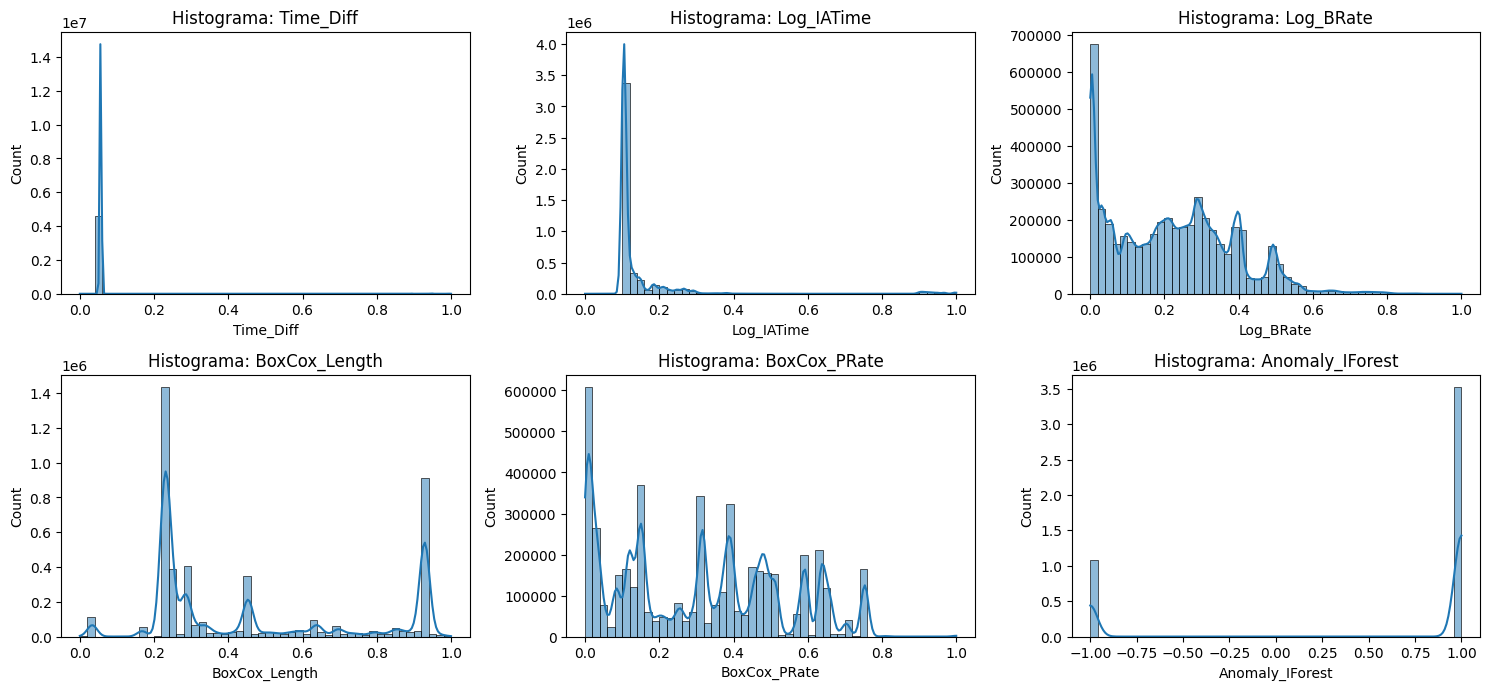

In [40]:
# Histograma de distribuição de features
features = df_train_scaled.columns[:-1]  # Exclui rótulos de anomalias
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train_scaled[feature], bins=50, kde=True)
    plt.title(f"Histograma: {feature}")
plt.tight_layout()
plt.show()

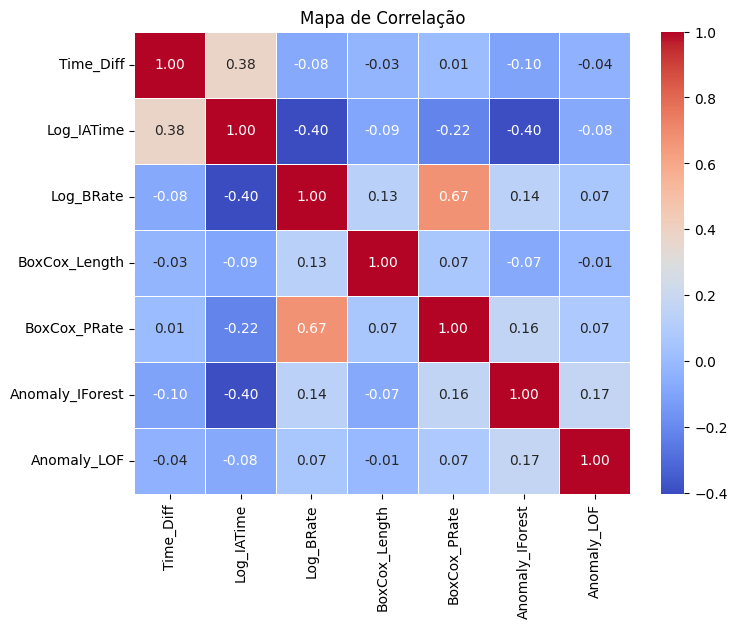

In [41]:
# Mapa de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_train_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

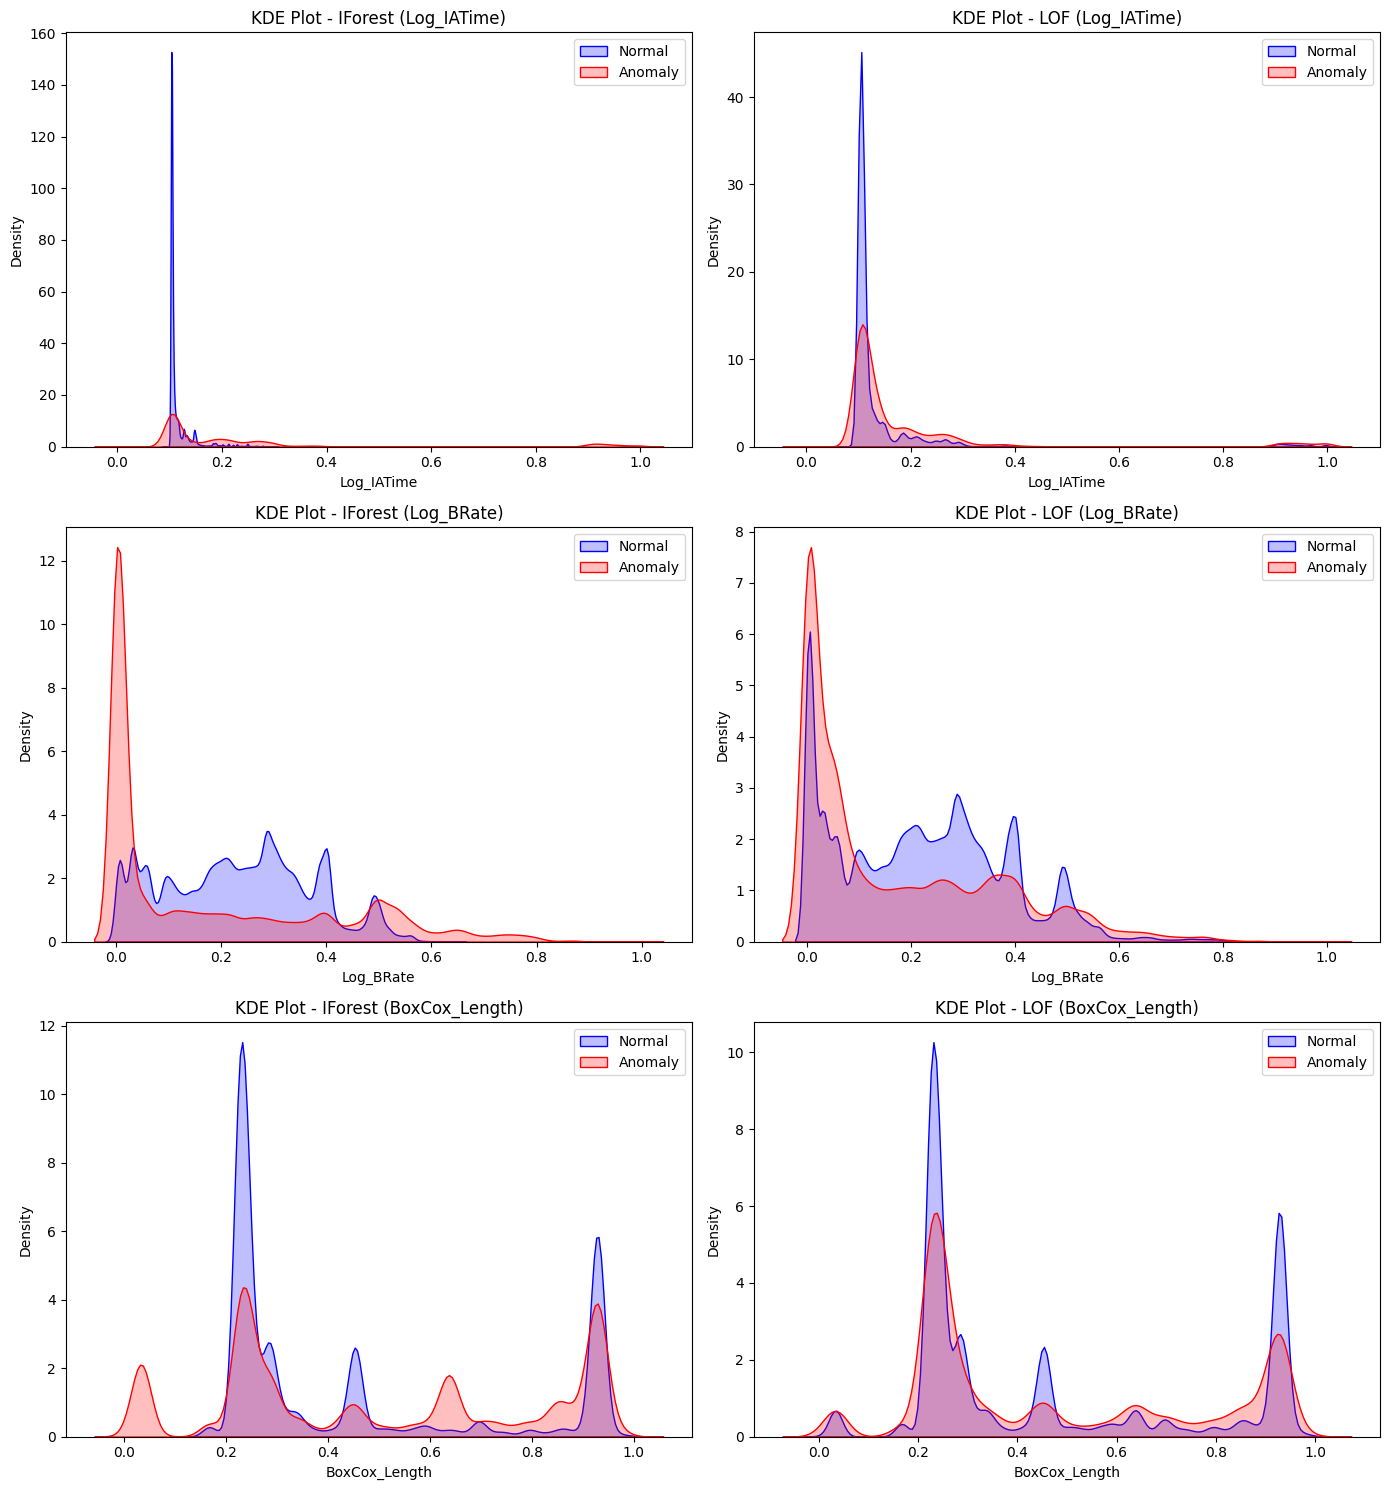

In [42]:
selected_features = ["Log_IATime", "Log_BRate", "BoxCox_Length"]

fig, axes = plt.subplots(len(selected_features), 2, figsize=(14, 5 * len(selected_features)))

for i, feature in enumerate(selected_features):
    # Isolation Forest KDE
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_IForest"] == 1][feature], 
                label="Normal", color="blue", ax=axes[i, 0], fill=True)
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_IForest"] == -1][feature], 
                label="Anomaly", color="red", ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f"KDE Plot - IForest ({feature})")
    axes[i, 0].legend()
    
    # Local Outlier Factor KDE
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_LOF"] == 1][feature], 
                label="Normal", color="blue", ax=axes[i, 1], fill=True)
    sns.kdeplot(df_train_scaled[df_train_scaled["Anomaly_LOF"] == -1][feature], 
                label="Anomaly", color="red", ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f"KDE Plot - LOF ({feature})")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()